In [1]:
import BioSimSpace as BSS
import numpy as np
import matplotlib.pyplot as plt

INFO:rdkit:Enabling RDKit 2022.09.1 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
inputs_dir = '../inputs'
system = BSS.IO.readMolecules([f"{inputs_dir}/complex.prmtop", f"{inputs_dir}/complex.rst7"])
p0, p1 = BSS.Metadynamics.CollectiveVariable.makeFunnel(system)

In [3]:
new_upper_bound = BSS.Metadynamics.Bound(3.5*BSS.Units.Length.nanometer)
cv = BSS.Metadynamics.CollectiveVariable.Funnel(p0, p1, upper_bound=new_upper_bound)

In [4]:
protocol = BSS.Protocol.Metadynamics(cv)

In [6]:

plumed = BSS.Process.Plumed(work_dir="../backup/")
config = plumed.createConfig(system, protocol)

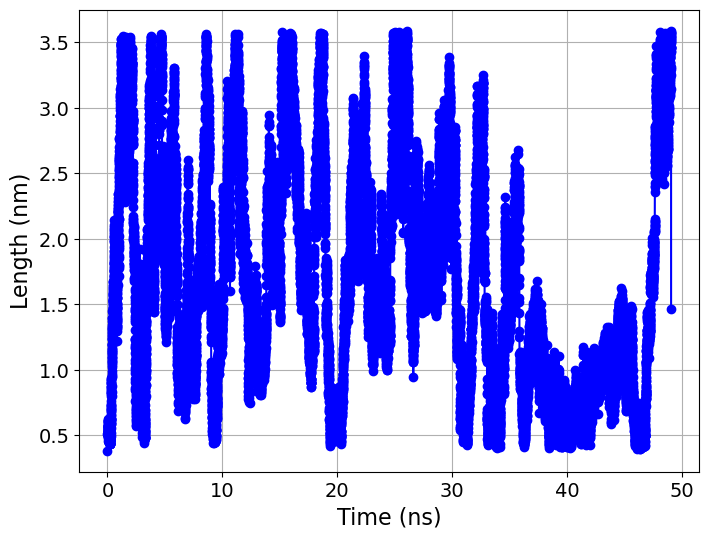

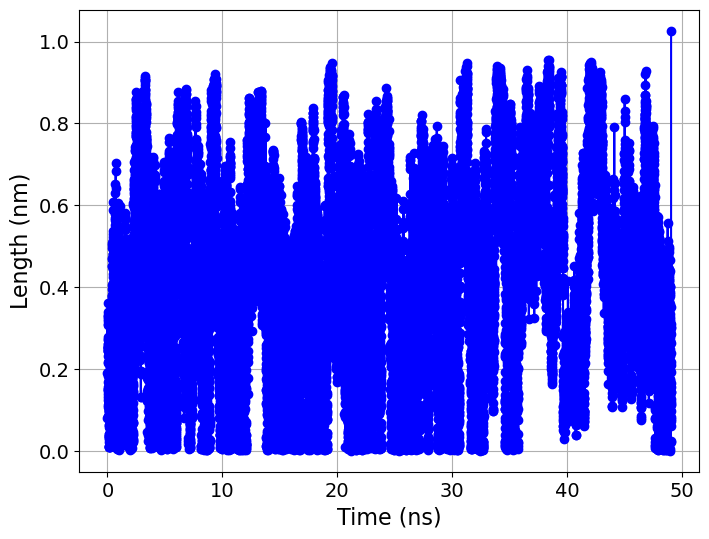

In [7]:
BSS.Notebook.plot(x=plumed.getTime(time_series=True),
                  y=plumed.getCollectiveVariable(0, time_series=True))
BSS.Notebook.plot(x=plumed.getTime(time_series=True),
                  y=plumed.getCollectiveVariable(1, time_series=True))

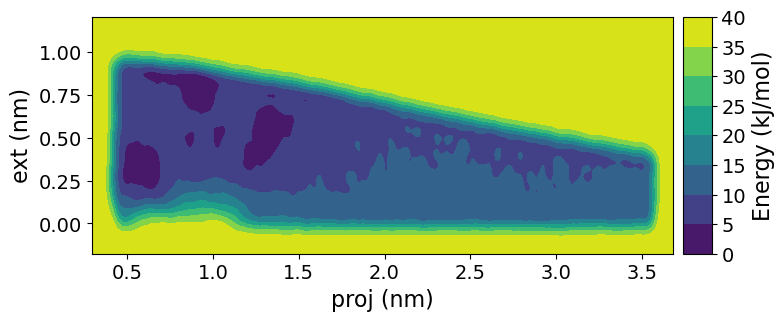

In [8]:
free_nrg = plumed.getFreeEnergy()
BSS.Notebook.plotContour(free_nrg[0], free_nrg[1], free_nrg[2], xlabel='proj (nm)', ylabel='ext (nm)')

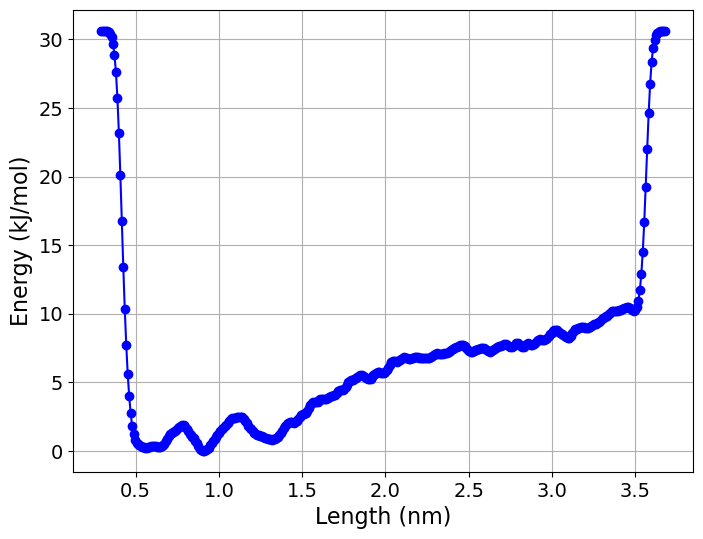

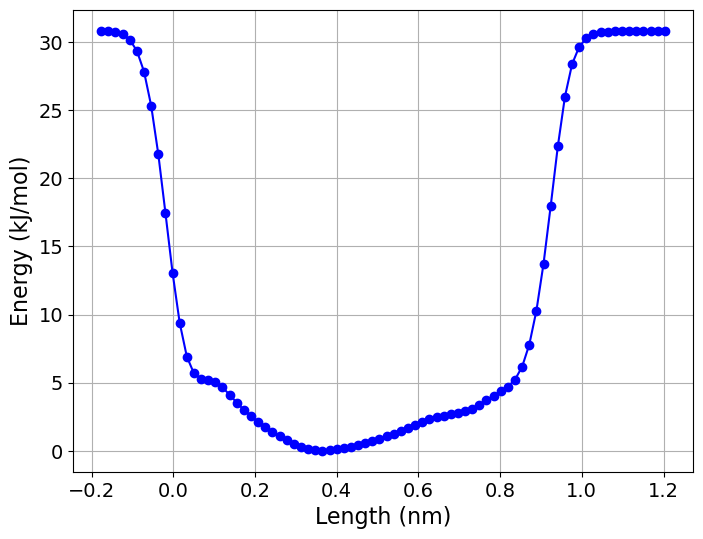

In [9]:
# the projection CV vs FE
free_nrg0 = plumed.getFreeEnergy(0, kt=2.49*BSS.Units.Energy.kt)
BSS.Notebook.plot(free_nrg0[0], free_nrg0[1])

# the extent CV vs FE
free_nrg1 = plumed.getFreeEnergy(1, kt=2.49*BSS.Units.Energy.kt)
BSS.Notebook.plot(free_nrg1[0], free_nrg1[1])

In [11]:
funnel_correction = cv.getCorrection().kcal_per_mol()


# the last 0.5 nm of the projection CV are between indices -75 to -25

free_nrg_floats = [ i.kj_per_mol().value() for i in free_nrg0[1][-75:-25] ]
print(free_nrg_floats )

estimate = -(np.mean(free_nrg_floats)/4.184 + funnel_correction.value())

print(f'the funnel correction = {funnel_correction}')
print(f'the ABFE estimate = {estimate:.2f} kcal/mol')

[8.822888886, 8.777409471, 8.691477198, 8.59781737, 8.514011574, 8.432178433, 8.345356629, 8.26272709, 8.219419847, 8.254884286, 8.378416719, 8.558297348, 8.733845911, 8.854873697, 8.912120042, 8.937172045, 8.968002866, 9.012154582, 9.042482678, 9.028120489, 8.975796831, 8.929567744, 8.936148437, 9.005233598, 9.103568147, 9.18361302, 9.227848428, 9.253877952, 9.296222872, 9.375577225, 9.487404456, 9.605898134, 9.701373173, 9.759734124, 9.796705902, 9.850209729, 9.945354199, 10.068472069, 10.172802108, 10.216376419, 10.203610834, 10.178199972, 10.183263539, 10.227901699, 10.291608737, 10.350349166, 10.399533098, 10.440703234, 10.466632166, 10.458561388]
the funnel correction = -1.3963 kcal/mol
the ABFE estimate = -0.83 kcal/mol


In [12]:
free_nrg_series = plumed.getFreeEnergy(0, stride=500) 

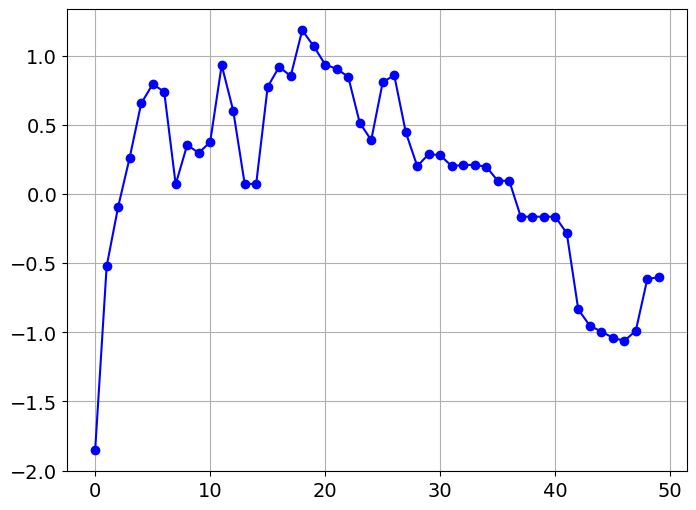

In [13]:
funnel_correction = cv.getCorrection().kcal_per_mol()

estimates_list = []
for item in range(np.shape(free_nrg_series)[0]):
    free_nrg_floats = [ i.value() for i in free_nrg_series[item][1][-75:-25] ]
    estimate = -(np.mean(free_nrg_floats)/4.184 + funnel_correction.value())
    estimates_list.append(estimate)
    
BSS.Notebook.plot(estimates_list)